<a href="https://colab.research.google.com/github/yuaquintero/DeepLearning/blob/master/U2_06_%5BTALLER%5D_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

In [0]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

setting tensorflow version in colab


'2.1.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


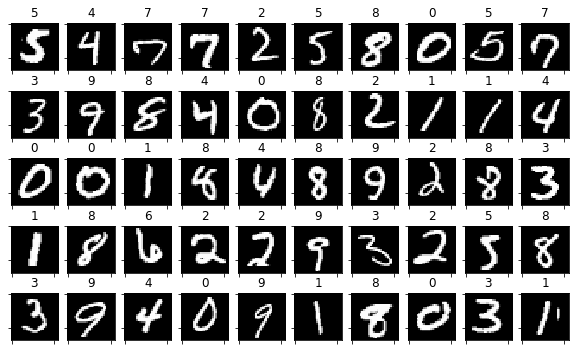

In [0]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Autoencoder with small (sparse) activations

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [0]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.regularizers import l1
import tensorflow as tf

## Implement the following loss function

given:

- $k=50$, latent dimension
- $\mathbf{x}^{(i)} \in \mathbb{R}^{784}$
- $e(\mathbf{x}^{(i)}) \in \mathbb{R}^{k}$, the encoder
- $d(e(\mathbf{x}^{(i)})) \in \mathbb{R}^{784}$, the decoder

implement the following cost function

$$\text{loss}(\mathbf{x}^{(i)}) = \frac{1}{m}\sum_m \big(\mathbf{x}^{(i)} - d(e(\mathbf{x}^{(i)}))\big)^2 + \beta \frac{1}{k}\sum_{k,i} e(\mathbf{x}^{(i)})$$


In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse


def get_model(input_dim, code_size, beta=.01):
    inputs = Input(shape=input_dim)
    encoder = Dense(code_size, activation='relu')(inputs)
    outputs = Dense(input_dim, activation='sigmoid')(encoder)

    avg_latent_activations = tf.reduce_mean(encoder, axis=0)
    loss =tf.reduce_mean((inputs-outputs)**2)+beta*avg_latent_activations

    model = Model([inputs], [outputs])    
    model.add_loss(loss)

    model.compile(optimizer='adam')
    return model, encoder, avg_latent_activations

In [0]:
model, encoder, avg_latent_activations = get_model(input_dim=X.shape[1], code_size=50, beta=0.05)

try with larger layer, try with more layers

In [0]:
model.fit(X_train, epochs=100, batch_size=32)

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 0s 324us/sample - loss: 0.2125
Epoch 2/100
1200/1200 [==============================] - 0s 108us/sample - loss: 0.1227
Epoch 3/100
1200/1200 [==============================] - 0s 116us/sample - loss: 0.1017
Epoch 4/100
1200/1200 [==============================] - 0s 115us/sample - loss: 0.0924
Epoch 5/100
1200/1200 [==============================] - 0s 114us/sample - loss: 0.0833
Epoch 6/100
1200/1200 [==============================] - 0s 126us/sample - loss: 0.0746
Epoch 7/100
1200/1200 [==============================] - 0s 117us/sample - loss: 0.0681
Epoch 8/100
1200/1200 [==============================] - 0s 114us/sample - loss: 0.0640
Epoch 9/100
1200/1200 [==============================] - 0s 117us/sample - loss: 0.0615
Epoch 10/100
1200/1200 [==============================] - 0s 118us/sample - loss: 0.0597
Epoch 11/100
1200/1200 [==============================] - 0s 113us/sample - loss: 0.0584
Epoch 12

In [0]:
fl = K.function([model.input], [avg_latent_activations])
fl(X_train)

[array([0.32265395, 0.28976473, 0.        , 0.3751445 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5896965 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43670353, 0.48616502, 0.        , 0.        ,
        0.        , 0.3071425 , 0.31703466, 0.        , 0.41073662,
        0.        , 0.        , 0.45222065, 0.        , 0.66149664,
        0.        , 0.        , 0.        , 0.59942997, 0.5182873 ,
        0.5167815 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5856426 , 0.46812484, 0.59347725,
        0.        , 0.        , 0.        , 0.        , 0.57897717],
       dtype=float32)]

###  test the reconstruction

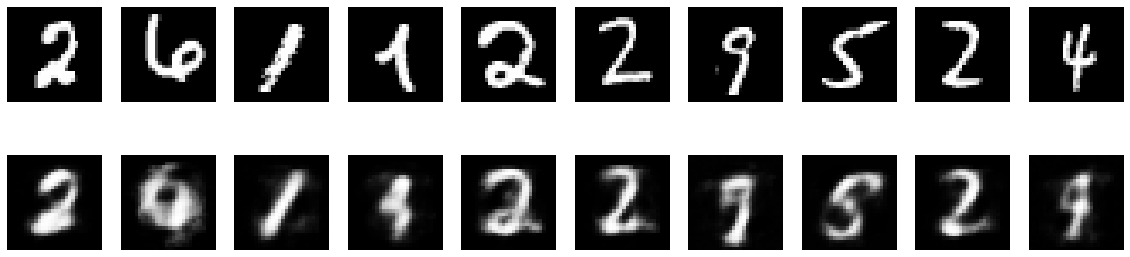

In [0]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### show the weights

In [0]:
w = model.get_weights()
w[0].shape


(784, 50)

In [0]:
print(w[0])

[[-0.02641262 -0.01695114  0.0117946  ... -0.06852359  0.01817508
  -0.04193671]
 [ 0.04063012 -0.05669631  0.07910267 ...  0.08314223  0.0742638
  -0.06453554]
 [ 0.01553734  0.03335869  0.04847568 ...  0.03918994  0.01196238
   0.01321716]
 ...
 [-0.06133696  0.04761376  0.05445489 ... -0.01054835  0.00777901
   0.0452261 ]
 [-0.04632701  0.04576511 -0.07174917 ... -0.01064435  0.01043735
   0.06595578]
 [-0.05781184  0.06451937  0.01290578 ... -0.01779015  0.02568775
  -0.03877742]]


### show activations in latent space

you should get something similar to this, indicating a much more sparse representation

In [0]:
from IPython.display import Image
Image(filename='local/imgs/ae_sparse_activations.png')

FileNotFoundError: ignored

encoded data size (200, 50)
mean activation at encoder 0.171


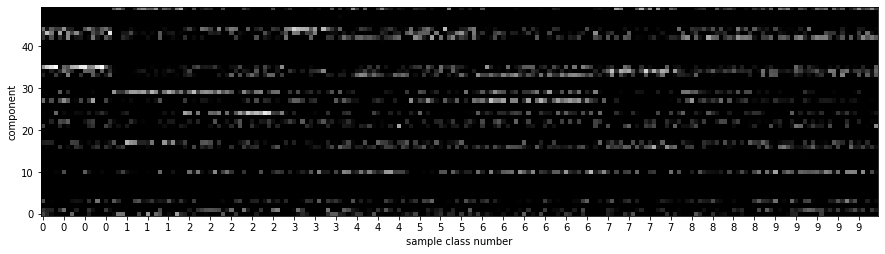

In [0]:
idxs = np.random.permutation(len(X_test))[:200]
idxs = idxs[np.argsort(y_test[idxs])]
y_sample = y_test[idxs]
X_sample = X_test[idxs]

import tensorflow.keras.backend as K
l0_output = K.function([model.input], [encoder])
X_sample_encoded = l0_output([X_sample])[0]
print("encoded data size", X_sample_encoded.shape)
plt.figure(figsize=(15,10))
plt.imshow(X_sample_encoded.T, cmap=plt.cm.Greys_r, origin="bottom")
plt.ylabel("component")
plt.xlabel("sample class number")
plt.xticks(range(len(y_sample))[::5], y_sample[::5]);
print ("mean activation at encoder %.3f"%np.mean(X_sample_encoded))

### show the distribution of activations in latent space

should be quite concentrated at 0

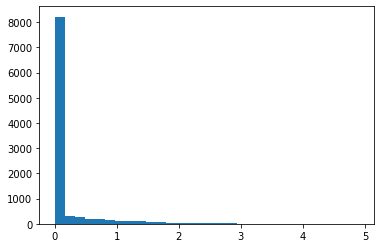

In [0]:
plt.hist(X_sample_encoded.flatten(), bins=30);

### show most representative neuron in latent space for each class

now, representative neurons must show somewhat distinctive shapes for each number


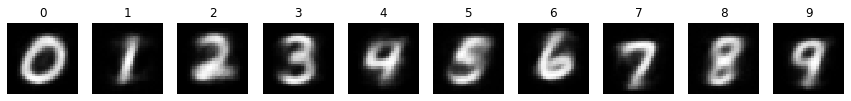

In [0]:
X_train_encoded = l0_output([X_train])[0]

fdecode = K.function([encoder], [model.outputs])
plt.figure(figsize=(15,3))
for k, i in enumerate(np.unique(y_train)):
    plt.subplot(1,10,k+1)
    plt.imshow(fdecode(X_train_encoded[y_train==i].mean(axis=0).reshape(1,-1))[0][0][0].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off"); plt.title("%d"%i);

class 0, most avg activated neuron is 35, with value 2.63
class 1, most avg activated neuron is 29, with value 1.72
class 2, most avg activated neuron is 24, with value 1.47
class 3, most avg activated neuron is 44, with value 1.99
class 4, most avg activated neuron is 10, with value 1.42
class 5, most avg activated neuron is 43, with value 1.08
class 6, most avg activated neuron is 27, with value 1.62
class 7, most avg activated neuron is 34, with value 1.97
class 8, most avg activated neuron is 42, with value 1.37
class 9, most avg activated neuron is 49, with value 1.12


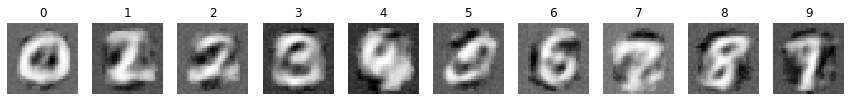

In [0]:
X_train_encoded = l0_output([X_train])[0]
plt.figure(figsize=(15,3))
for k, i in enumerate(np.unique(y_train)):
    plt.subplot(1,10,k+1)
    k = np.zeros(50)
    most_activated_neuron = np.argmax(X_train_encoded[y_train==i].mean(axis=0))
    k[np.argmax(X_train_encoded[y_train==i].mean(axis=0))] = 1
    print ("class %d, most avg activated neuron is %d, with value %.2f"%(i, most_activated_neuron, np.max(X_train_encoded[y_train==i].mean(axis=0))))
    plt.imshow(fdecode(k.reshape(1,-1))[0][0][0].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off"); plt.title("%d"%i);